# Сборный проект №1. 
# Выявление закономерностей определяющие успешность игры


Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
я располагаю данными до 2016 года. Задача спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Открою файл с данными и изучу общую информацию

#### 1.1. Импортирую необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore') 

#### 1.2. Открою датафрейм

In [2]:
pd.set_option('display.max_columns', 50)
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('D:/repository/projects/4_сборный проект 1/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 1.3. Изучу общую информацию

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# для наглядности отдельно посмотрю на пропуски
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# узнаю есть ли дубликаты
games.duplicated().sum()

0

#### Что видим:

Таблица состоит из 11 столбцов и 16715 строк. 

Имеются пропуски в столбцах:
- name - 2 (удалим их, не зная названия игры нельзя делать какой-то вывод и 2 значения не повлияют на итоговый результат)
- year_of_release - 269 (вряд ли получится заполнить пропуски, оставим как есть)
- genre - 2 (так же можно удалить)
- critic_score - 8578 (предполагаю что игры старые, на момент релиза не было порталов, где публиковался материал по теме или просто не самые популярные игры)
- user_score - 6701 (думаю что тут такая же история, как с оценками критиков) 
- rating - 6766 (на данный момент сложно что-то говорить по поводу этих пропусков, разберусь по ходу анализа)




# Шаг 2. Подготовьте данные

#### 2.1. Приведём названия столбцов к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2. Работа с пропусками

##### 2.2.1. Удалим пропуски в столбцах name и genre

In [7]:
games = games.dropna(subset=['name', 'genre']).reset_index()

##### 2.2.2.  Отработка пропусков в столбцах с рейтингом

В столбце user_score есть значениу 'tbd'. По сути это пропуск, т.к. нет достаточного числа оценок, чтобы сформировать рейтинг. 

In [8]:
games.query('user_score == "tbd"').head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Заменим tbd на nan

In [9]:
games['user_score'] = games['user_score'].replace("tbd", np.NaN)

Остальные пропуски отработать не представляется возможным, оставляем как есть.

#### 2.3. Замена типов данных

In [10]:
columns = ['year_of_release', 'critic_score']
for col in columns:
    games[col] = games[col].astype('Int64')

In [11]:
games['user_score'] = games['user_score'].astype('Float64')

# Шаг 3. Исследовательский анализ

#### 3.1. Суммарные продажи во всех регионах

In [12]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

#### 3.2. Cколько игр выпускалось в разные годы

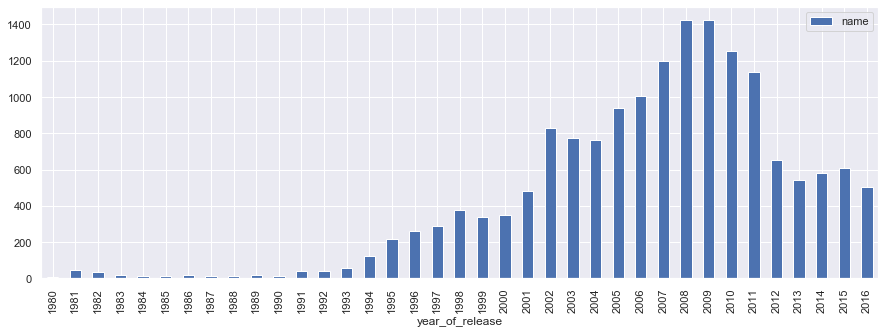

In [13]:
games_per_year = games.pivot_table(index='year_of_release',
                                   values='name',
                                   aggfunc='count').plot(kind='bar', grid=True, figsize=(15,5))
plt.show()

#### 3.3. Продажи по платформам в разные годы

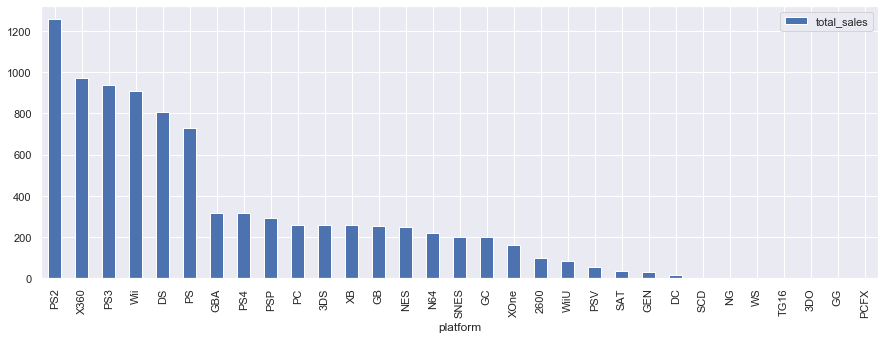

In [14]:
platform_sales = games.pivot_table(index='platform',
                                   values='total_sales',
                                   aggfunc='sum').sort_values(by='total_sales',
                                                              ascending=False).reset_index()
platform_sales.plot('platform', 'total_sales', kind='bar', grid=True, figsize=(15,5))
plt.show()

Выделяются 6 платформ, используем их для дальнейшего анализа. К моему удивлению в топ не попала консоль PS4, ну ладно, это не так важно.



Составим словарь с названием самых популярных платформ 

In [15]:
top6_list = {x[0] for x in platform_sales.head(6).itertuples(index=False)}

#### 3.4. Время жизни платформы

Посмотрим на распределение по годам из списка ТОП-6, напомню что данные до 1994 не рассматриваются

In [16]:
top6 = (games
        .query('platform in @top6_list & year_of_release >= 1994')
        .pivot_table(index='year_of_release', columns='platform',
                    values='total_sales', aggfunc='sum').fillna(0)
       )

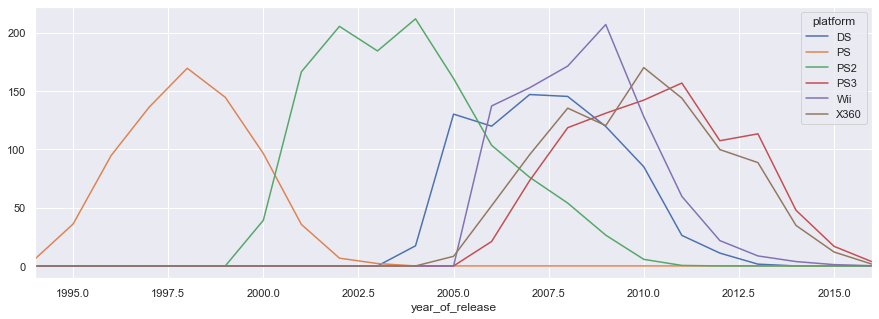

In [17]:
top6.plot(grid=True, figsize=(15,5))
plt.show()

Среднее время жизни платформы составляет 8-10 лет. Следовательно далее будем работать с данными от 2006 года.

#### 3.5. Лидеры продаж. Выбор потенциально прибыльных платформ

Поскольку данные за 2016 год не полные, в рассчёт пока не буду брать этот год, т.е. рассматриваю до 2015

In [18]:
leader_sales = (games
        .query('2006<=year_of_release<=2015')
        .pivot_table(index='year_of_release', columns='platform',
                    values='total_sales', aggfunc='sum').fillna(0)
       )

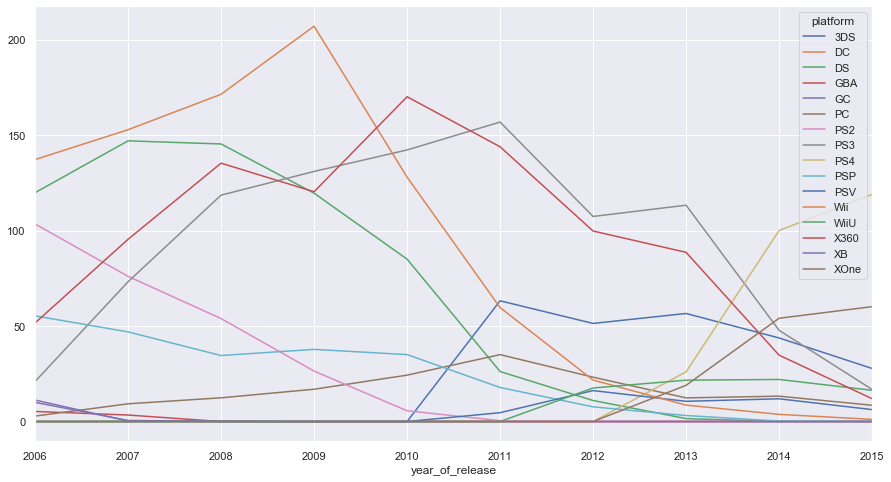

In [19]:
leader_sales.plot(grid=True, figsize=(15,8))
plt.show()

Ожидаемо в лидеры выбились PS4 и XOne. С мосмента релиза (2012 год) обе платформы растут и учитывая, что ранее я выяснил продолжительность жизни 8-10 лет - они продолжат расти. Так же, одной из прибыльных платформ, ожидал увидеть PC, но к моему удивлению данные это не подтверждают.



#### 3.6. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

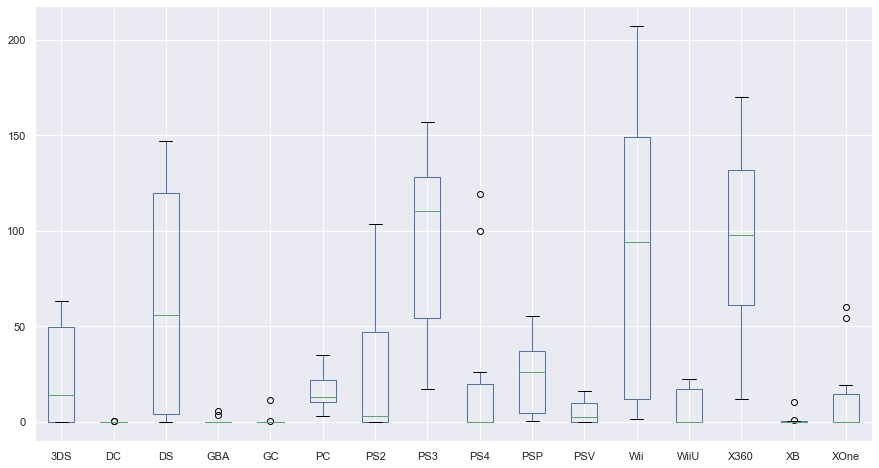

In [20]:
leader_sales.boxplot(figsize=(15,8))
plt.show()

Nintendo выделялась сразу двумя консолями DS и Wii, конкурентом Wii была PS3 и X360 (у этих платформ продажи примерно одиныковые, у xbox чуть выше). Если смотреть только на перспективные платформы, то PS4 явный лидер, суммарные продажи выше почти в 2 раза, по сравнению с XOne


#### 3.7. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Для корректного анализа оценки критиков приведём к единому масштабу с оценками пользователей

In [21]:
games['critic_score'] = games['critic_score'] / 10

Составим отдельный датафрейм только с лидерами продаж 

In [22]:
impact_of_rating = pd.DataFrame(games.query('platform == "PS4" or platform == "XOne"'))
impact_of_rating.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66


Сделаем срезы для ps4 и xone

In [23]:
ps4 = (impact_of_rating[['platform', 'total_sales', 'critic_score', 'user_score']]
       .query('platform=="PS4"'))

In [24]:
xone = (impact_of_rating[['platform', 'total_sales', 'critic_score', 'user_score']]
       .query('platform=="XOne"'))

Рассчитаю коэффэффициент кореляции для каждой платформы и построю диаграмму рассеяния между отзывами и продажами

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.03195711020455643


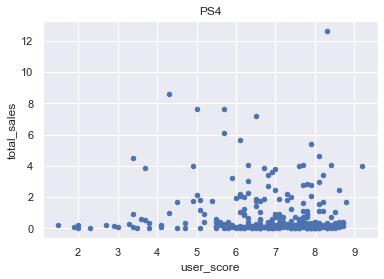

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.4065679020617815


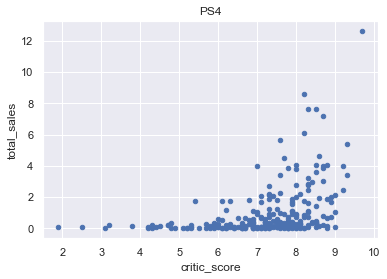

In [25]:
for column in ['user_score', 'critic_score']:
    print(ps4[column].corr(ps4['total_sales']))
    #sns.pairplot(ps4)
    ps4.plot(x=column, y='total_sales', title='PS4', kind='scatter', grid=True)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.06892505328279416


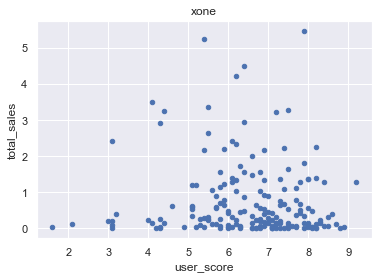

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.41699832800840164


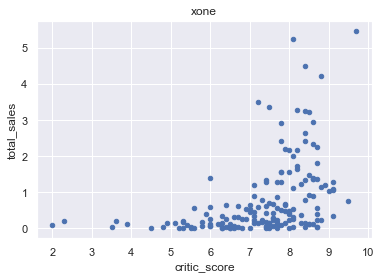

In [26]:
for column in ['user_score', 'critic_score']:
    print(xone[column].corr(xone['total_sales']))
    #sns.pairplot(xone)
    xone.plot(x=column, y='total_sales', title='xone', kind='scatter', grid=True)
    plt.show()

Глядя на диаграммы делаю вывод, что оценки пользователей не влияют на суммарные продажи. Геймеры больше доверяют критикам, это подтверждают диаграмма рассеяния по обоим платформам, но коэффициент кореляции слабый. Следователно делаю вывод что напрямую оценки критиков не всегда влияют на продажи. 

#### 3.8. Сравнение продаж  игр на лидирующую платформу и  другую 

Для сравнения выберем некогда популярную платформу PS3

In [27]:
comp = pd.DataFrame(games.query('platform == "PS3"'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.12669133936341698


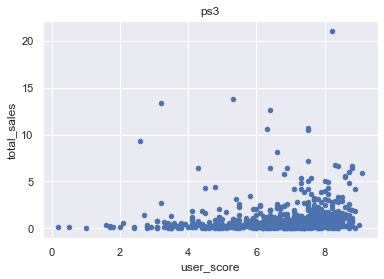

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.43243156856420606


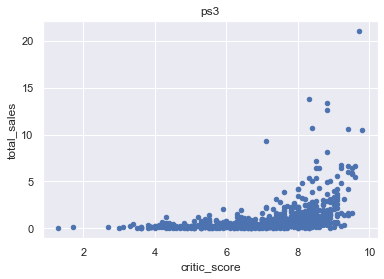

In [28]:
for column in ['user_score', 'critic_score']:
    print(comp[column].corr(comp['total_sales']))
    #sns.pairplot(comp)
    comp.plot(x=column, y='total_sales', title='ps3', kind='scatter', grid=True)
    plt.show()

Картина абсолютно такая же, корреляция слабая, распределения очень похожи на распределения по современным платформам. 



#### 3.9. Общее распределение игр по жанрам

Составим выборку по каждому жанру. В расчёт берём только актуальный период. 

In [29]:
genre_sales = games.query('year_of_release>2005').groupby('genre').agg({'name':'count', 'total_sales': 'sum'}) \
    #.sort_values(by='name', ascending=False) #.plot(grid=True, kind='bar', figsize=(15,5))

Нарисую столбчатые диаграммы, для наглядности первая будет сортирована по названию жанра, а вторая по продажам.

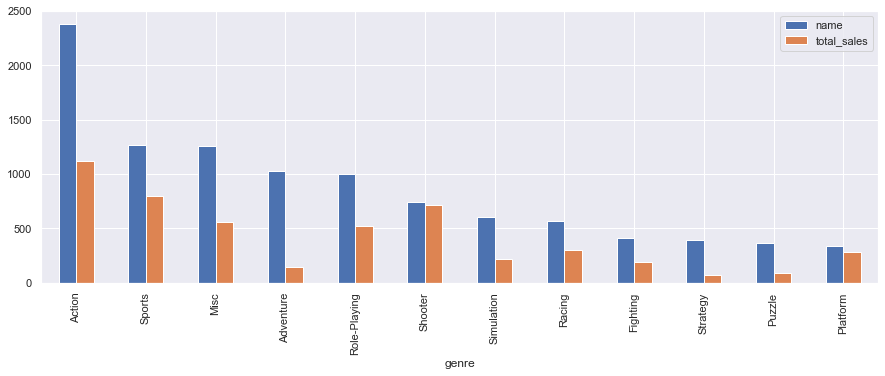

In [30]:
genre_sales.sort_values(by='name', ascending=False).plot(grid=True, kind='bar', figsize=(15,5))
plt.show()

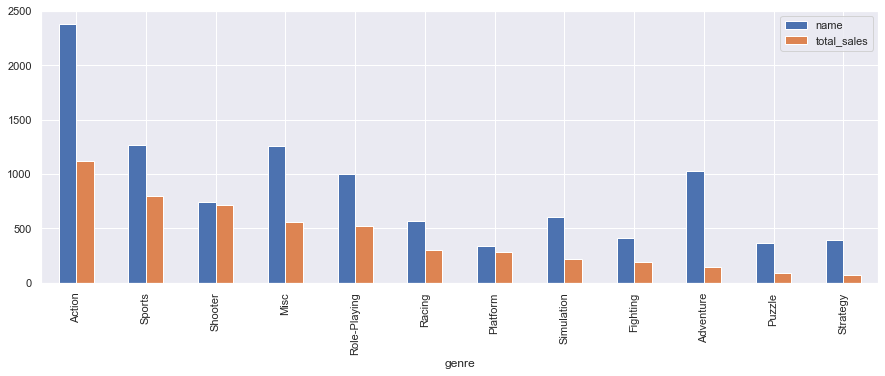

In [31]:
genre_sales.sort_values(by='total_sales', ascending=False).plot(grid=True, kind='bar', figsize=(15,5))
plt.show()

Самый популярный жанр - это экшен, далее спортивные игры. По прибыльности: экшен, спортивные и следом шутеры. Среди жанров выделяется жанр шутер. Выручка от шутеров и спортивных игр почти не отличается, несмотря на то что шутров выпускается почти в 2 раза меньше, т.е. шутер, как жанр на 6 месте, а по суммарным продажам занимает третье место. Так же выделяется жанр приключения,  по количеству игр находится на 4м месте, но прибыли приносит мало (в самом хвосте).



# Шаг 4. Портрет пользователя каждого региона

Составим список интересующих нас столбцов

In [32]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

#### 4.1. Самые популярные платформы

Составим сводные таблицы по каждому региону сгруппировав по платформам и визуализируем полученые данные

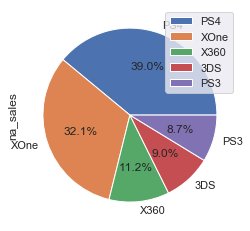

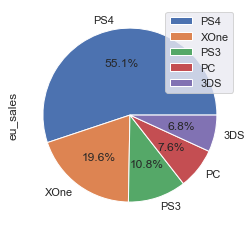

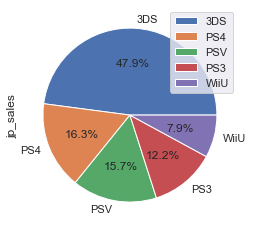

In [33]:
for column in columns:
    region_platform = games.query('year_of_release>2013').pivot_table(index='platform', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).reset_index().nlargest(5, column)
    #print(region_platform)
    region_platform.plot(kind='pie', y=column, autopct='%1.1f%%', labels=region_platform['platform'])
    plt.show()

В Северной Америке с большим отрывом лидируют ps4 и xone, разница доли рынка составляет 7%, не мало конечно, но по сравнению с другими платформами имеют явное преимущество. Такой разрыв можно сократить, стимулируя выпуск определённых эксклюзивов (один из вариантов). 

В Европе ситуация немного отличается, более 50% рынка занимает приставка от компании Sony, т.е. Microsoft вообще не конкурент, учитывая что и PS3 всё ещё "на плаву", доля XOne всего на 9 процентов больше PS3. 

Японский ТОП сильно отличается. основную долю, почти 50% занимает портативная консоль от компании Nintendo, замыкает ТОП-5 тоже пораттивная консоль от Nintendo. Не смотря на провальный старт 3DS, повлекший падение акций Nintendo в 2011 году, на родине приставка всё равно в ТОПЕ, не смотря на то что даже на 2016 уже не самое инновационное решение.


Подводя итог делаю вывод: В Северной Америке и Европе геймеры предпочитают стационарные консоли, а в Японии наоборот портативные. Полагаю это связано с ритмом жизни.

#### 4.2. Самые популярные жанры

Составим сводные таблицы по каждому региону сгруппировав по жанрам и визуализируем полученые данные

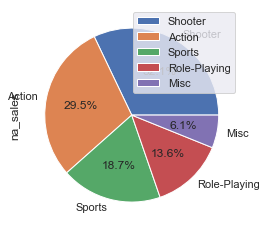

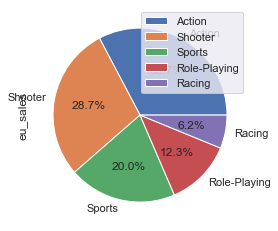

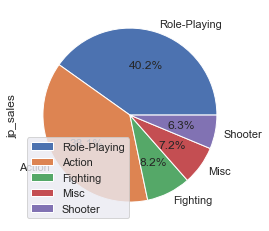

In [34]:
for column in columns:
    region_genre = games.query('year_of_release>2013').pivot_table(index='genre', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).reset_index().nlargest(5, column)
    #print(region_genre)
    region_genre.plot(kind='pie', y=column, autopct='%1.1f%%', labels=region_genre['genre'])
    plt.show()

В Северной Америке и Европе крайне похожие распределения по жанрам. На первом и втором месте уверенно держатся жанры шутер и экшен. В принципе в ТОП-5 этих регионов по миом незначительного отличия по долям, отличается только замыкающая ТОП позиция. Исходя из этого делаю вывод, что геймеры в этих регионах предпочитают одинаковые игры.

Япония сновы выделилась, на первом месте располагается жанр RPG, большинству геймеров нравится отыгрывать роли, вникать в глубокие диалоги и исследовать большие игровые пространства.

#### 4.3. Влияние рейтинга ESRB на продажи в каждом регионе

Посмотрю какие присутствуют значения в столбце и дам обоснование

In [35]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

 «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше

 «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше

 «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет

 «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

 «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше

 «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

 «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет

Составим сводные таблицы по каждому региону сгруппировав по жанрам и визуализируем полученые данные

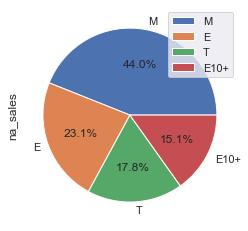

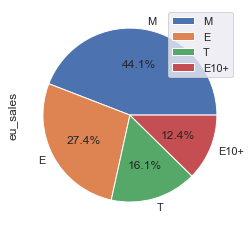

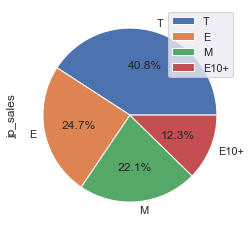

In [36]:
for column in columns:
    region_rating = games.query('year_of_release>2013').pivot_table(index='rating', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).reset_index()
    #print(region_genre)
    region_rating.plot(kind='pie', y=column, autopct='%1.1f%%', labels=region_rating['rating'])
    plt.show()

Опять же в Северной Америке и Европе распределения почти не отличаются, незначительные отличия по распределению долей. Лучше всего продаются игры для взрослых. Могу сделать вывод, что геймеры в этих регионах так же предпочитают одни и те же игры.

В Японии в основном играют дети. Примерно на 20% меньше подростков и взрослых. 



# Шаг 5. Проверка гипотез

#### Шаг 5.1. Сравнение пользовательских рейтингов на Xbox One и PC

Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н1 - средние пользовательские рейтинги платформ Xbox One и PC различаются;

Составлю выборки для владельцев xbox и pc

In [37]:
xbox_rating = pd.DataFrame(games.query('platform=="XOne"'))
pc_rating = pd.DataFrame(games.query('platform=="PC"'))

Удаляю пропуски в столбцах user_score

In [38]:
xbox_rating = xbox_rating.dropna(subset=['user_score']).reset_index()
pc_rating = pc_rating.dropna(subset=['user_score']).reset_index()

Построение распределений, по обеим выборкам

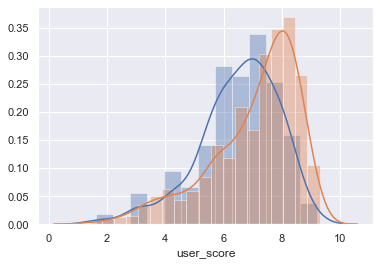

In [39]:
for column in ['user_score']:
    sns.distplot(xbox_rating['user_score'], kde=True)
    sns.distplot(pc_rating['user_score'], kde=True)
    plt.show()

Поскольку я сравниваю две независимые совокупности, распределения похожи на нормальные, для проверки гипотезы подойдёт ttest. Критический уровень значимости установлю 5%

In [40]:
alpha = .05

results = st.ttest_ind(xbox_rating['user_score'], pc_rating['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


In [41]:
print ('Средний рейтинг на xbox:', xbox_rating['user_score'].mean())
print ('Средний рейтинг на pc:', pc_rating['user_score'].mean())

Средний рейтинг на xbox: 6.521428571428572
Средний рейтинг на pc: 7.062467532467533


Гипотеза не подтвердилась, пользовательские рейтинги на xbox и  pc различаются. На ПК рейтинги немного выше.

#### Шаг 5.2. Сравнение пользовательских рейтингов жанров Action и Sports

Н0 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

Н1 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

Составлю выборки по интересующим жанрам

In [42]:
action = pd.DataFrame(games.query('genre=="Action"'))
sports = pd.DataFrame(games.query('genre=="Sports"'))

Удаляю пропуски в столбцах user_score

In [43]:
action = action.dropna(subset=['user_score']).reset_index()
sports = sports.dropna(subset=['user_score']).reset_index()

Построение распределений, по обеим выборкам

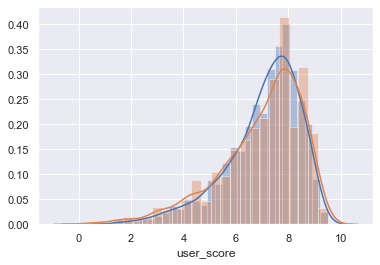

In [44]:
for column in ['user_score']:
    sns.distplot(action['user_score'], kde=True)
    sns.distplot(sports['user_score'], kde=True)

Поскольку я сравниваю две независимые совокупности, распределения похожи на нормальные, для проверки гипотезы подойдёт ttest. Критический уровень значимости установлю 5%

In [45]:
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


In [46]:
print ('Средний рейтинг в жанре экшен:', action['user_score'].mean())
print ('Средний рейтинг в жанре спорт:', sports['user_score'].mean())

Средний рейтинг в жанре экшен: 7.054043715846995
Средний рейтинг в жанре спорт: 6.961196736174069


Нет оснований отвергнуть нудевую гипотезу, рейтинги действительно разные, жанр экшен выигрывает. 



# Шаг 6. Общий вывод

#### Задача стояла выявить потенциально популярный продукт и спланировать рекламные компании. 

Я выяснил, что рынки Северной Америки и Европы очень похожи. Значительно отличается рынок в Японии. Следовательно стратегии продвежения того или иного продукта должны быть разными. 

Для NA и UE самые популярные платформы оказались PS4 и XOne, геймеры предпочитают игры жанров экшен и шутер. Следовательно стоит вложиться в рекламу именно таких продуктов. 

в Японии следует продвигать RPG и экшен игры, упор сделать на портативные консоли.


Но и не стоит забывать, что почти все игры не являются эксклюзивами и выпускаются на несколько платформ. Некогда выпустить эксклюзив - было маркетинговым ходом, с целью привлечения новых пользователей.

В дополнении узнал:
- средняя продолжительность жизни платформы составляет 8-10 лет
- геймеры из NA и UE очень похожи, подверждает это жанровые предпочтения
- опираясь на возрастной рейтинг, могу сказать, что большая часть продаж в Японии - это игры для подростков, в то время как в NA и EU больше игр покупают для взрослой аудитории